In [1]:
#imported package and library

import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#Dataset loaded

dataset = pd.read_csv("games.csv")
dataset.shape


(81312, 20)

In [2]:
#Dataset data types
print(dataset.dtypes)

#List of columns
print(dataset.columns)

#Displayed some rows of dataset
print(dataset.head(10))

id                        int64
type                     object
name                     object
yearpublished           float64
minplayers              float64
maxplayers              float64
playingtime             float64
minplaytime             float64
maxplaytime             float64
minage                  float64
users_rated               int64
average_rating          float64
bayes_average_rating    float64
total_owners              int64
total_traders             int64
total_wanters             int64
total_wishers             int64
total_comments            int64
total_weights             int64
average_weight          float64
dtype: object
Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype

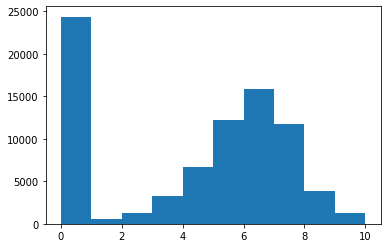

In [3]:
#Creating a histogram on average rating 

plt.hist(dataset["average_rating"])
plt.show()

## Noted

From the histogram we see the range of rating in 0 to 10 and where most of them are 0(zero).

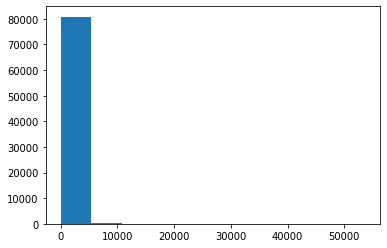

In [4]:
#Let's make an histogram by considering on user rated 

plt.hist(dataset["users_rated"])
plt.show()

## Removing rows without user reviews

In [5]:
#Let's remove rows withour user reviews

dataset = dataset[dataset["users_rated"]>0]
print(dataset.shape)


(56932, 20)


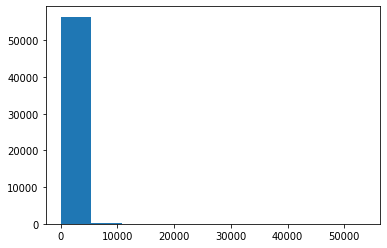

In [6]:
#now let's see tha histogram on users reviews

plt.hist(dataset["users_rated"])
plt.show()

(56894, 20)


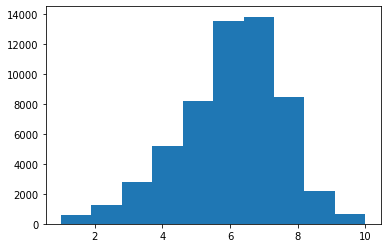

In [7]:
#removing rows with missing values

dataset = dataset.dropna(axis=0)
print(dataset.shape)

#showing the histogram on average rating

plt.hist(dataset["average_rating"])
plt.show()

In [8]:
#let's the 1st row whose average rating is 10

print(dataset[dataset["average_rating"]==10].iloc[0])

id                          13200
type                    boardgame
name                      Vox Pop
yearpublished                1938
minplayers                      2
maxplayers                     40
playingtime                     0
minplaytime                     0
maxplaytime                     0
minage                          0
users_rated                     1
average_rating                 10
bayes_average_rating            0
total_owners                    7
total_traders                   1
total_wanters                   0
total_wishers                   0
total_comments                  1
total_weights                   0
average_weight                  0
Name: 20226, dtype: object


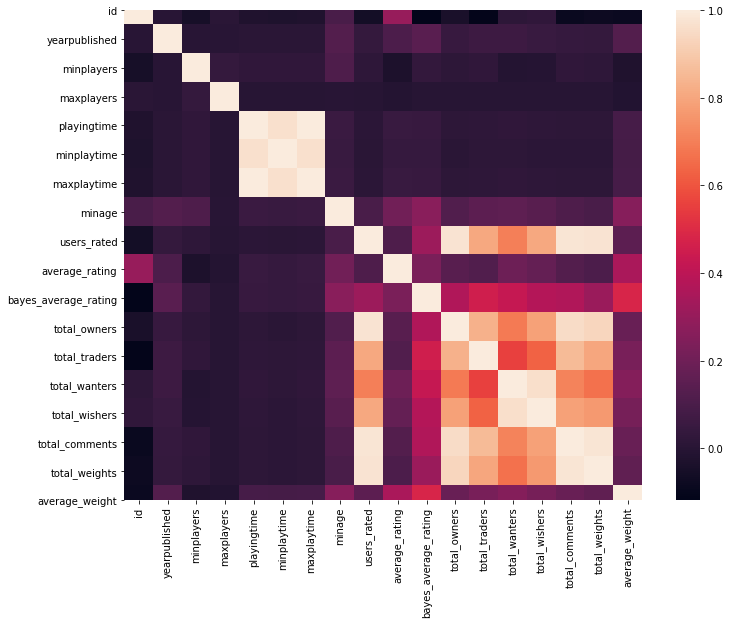

In [9]:
#Correlation matrix

corr_mat = dataset.corr()

fig = plt.figure(figsize = (12, 9))
sb.heatmap(corr_mat, vmax = 1.0, square=True)
plt.show()

In [10]:
#Creating an array for all the columns
columns = dataset.columns.tolist()
print(columns)

['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers', 'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated', 'average_rating', 'bayes_average_rating', 'total_owners', 'total_traders', 'total_wanters', 'total_wishers', 'total_comments', 'total_weights', 'average_weight']


In [11]:
dataset.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


From the above correlation we see some of the columns we don't need since they don't contain any relavant information.

In [12]:
#filtering columns
columns = [c for c in columns if c not in ['id', 'type', 'name', 'bayes_average_rating', 'average_rating']]
print(columns)

['yearpublished', 'minplayers', 'maxplayers', 'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated', 'total_owners', 'total_traders', 'total_wanters', 'total_wishers', 'total_comments', 'total_weights', 'average_weight']


In [13]:
#set target which variable will be stored and predicting on it.
target = "average_rating"

## Linear Regression

We will predict the average review of each board game using linear regression model. Here we will use the mean squared error as a performance metric. 

In [14]:
#separating dataset into train_dataset and test_dataset

train_dataset = dataset.sample(frac=0.8, random_state=1)
test_dataset = dataset.loc[~dataset.index.isin(train_dataset.index)]

print(train_dataset.shape)
print(test_dataset.shape)

(45515, 20)
(11379, 20)


In [15]:
#now performing linear regression model

#Initializing LinearRegression model

DataModel = LinearRegression()
DataModel.fit(train_dataset[columns], train_dataset[target])


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
#finidng predictions & mean squred error

predictions = DataModel.predict(test_dataset[columns])

#computing mean squared error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(predictions, test_dataset[target])
print(predictions)
print("Mean squared error using Linear Regression Model: {}".format(mse))

[8.1215759  9.20941269 8.61062702 ... 5.39193736 5.53832747 6.07967543]
Mean squared error using Linear Regression Model: 2.0787767119035703


## Random Forrest model

In [17]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, min_samples_leaf=10, random_state=1)
rf_model.fit(train_dataset[columns], train_dataset[target])

predictions = rf_model.predict(test_dataset[columns])
mse = mean_squared_error(predictions, test_dataset[target])

print("Mean squared error using Random Forees")


Mean squared error using Random Forees
